# From PCA to the Subspace Method

In the example code of this tutorial, we assume for simplicity that the following symbols are already imported.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

import sys, os, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
sys.path.insert(0, os.pardir)
import warnings
warnings.filterwarnings('ignore')

from cvt.models import SubspaceMethod

In this example we will start with principal component analysis (PCA) and work our way to classification with the subspace method (SM).

We will conduct the procedure in the following steps.

1. Prepare a dataset
2. Peform PCA on each class
3. Train the SM classifier
4. Improving results
5. In depth comparison

## 1. Prepare a dataset

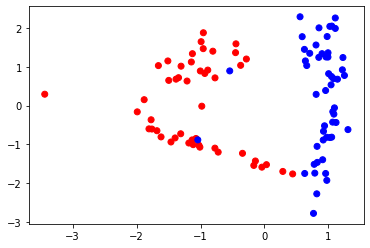

In [18]:
# Create a random set of data
X, y = make_classification(n_features=2, n_redundant=0)

# Plot the dataset
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(*X.T, c=y,cmap=cm_bright)
plt.show()

## 2. Perform PCA on each class

In many cases, the term "Subspace Method implies that the refere

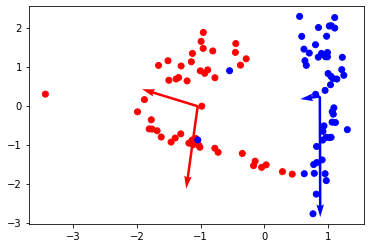

In [19]:
from operator import itemgetter

def pca(X, n_components):
    n, m = X.shape
    eig_vals, eig_vecs = np.linalg.eig(np.dot(X.T, X) / (n-1))
#     eig_vecs = [x for _,x in sorted(zip(eig_vals, eig_vecs), reverse=True)]
    return eig_vals, eig_vecs

origin = [0,0]

for i in range(2):
    Xc = X[np.where(y==i)]
    Xc_mean = Xc.mean(axis=0)
    Xc -= Xc_mean
    eig_vals, eig_vecs = np.linalg.eig(np.dot(Xc.T, Xc) / (len(Xc)-1))
    plt.quiver(*Xc_mean, eig_vals[0]*eig_vecs[:,0]*2, eig_vals[1]*eig_vecs[:,1], color=cm_bright(i), scale=5)

plt.scatter(*X.T, c=y,cmap=cm_bright)
plt.show()

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def format_input(X, y):
    X = [X[np.where(y==t)] for t in np.unique(y)]
    return X, np.unique(y)

smc = SubspaceMethod(n_subdims=1, faster_mode=True)
lda = LDA()

lda_x = lda.fit_transform(X,y)
lda_x = np.append(lda_x, lda_x, axis=1)
# Fit the data
smc.fit(*format_input(lda_x, y))
# Predict the classes
y_pred = smc.predict(lda_x)
# Caluclate the accuracy
smc.score(lda_x, y)

0.48

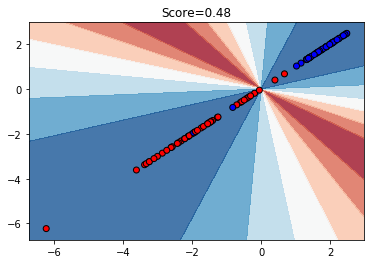

In [63]:
def plot_decision_boundaries(clf, X, y, h=0.01):
    fig, ax = plt.subplots()
        
    # Build mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    cm = plt.cm.RdBu
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.scatter(*X.T, c=y, cmap=cm_bright, edgecolors='k')
    ax.set_title(f'Score={clf.score(X,y)}')
    plt.show()
    
plot_decision_boundaries(smc, lda_x, y)